In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt


Define the Auto-Encoder Mode


In [2]:
def build_autoencoder():
    input_img = Input(shape=(256, 256, 3))
    
    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder


Compile and Summarize the Model

In [3]:
autoencoder = build_autoencoder()
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,731 (194.26 KB)

 Trainable params: 49,731 (194.26 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import os
import cv2
import numpy as np

def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (256, 256))
    img = img.astype('float32') / 255.0
    return img

def load_dataset(path):
    images = []
    for img_path in os.listdir(path):
        img = load_image(os.path.join(path, img_path))
        images.append(img)
    return np.array(images)

# Example: Load dataset
dataset_path = '/Users/prachidave/Downloads/python/self driving /data'
images = load_dataset(dataset_path)


Step 4: Training the Auto-Encoder
Train the Model

In [5]:
autoencoder.fit(images, images, epochs=50, batch_size=16, shuffle=True, validation_split=0.1)
# After training your model

# Save the model
model_save_path = '/Users/prachidave/Downloads/python/self driving/autoencoder_model.h5'
autoencoder.save(model_save_path)
print(f"Model saved to {model_save_path}")


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 929ms/step - loss: 0.6547 - val_loss: 0.5370
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 829ms/step - loss: 0.5287 - val_loss: 0.4857
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 833ms/step - loss: 0.5004 - val_loss: 0.4765
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 868ms/step - loss: 0.4879 - val_loss: 0.4750
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 867ms/step - loss: 0.4879 - val_loss: 0.4708
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 816ms/step - loss: 0.4890 - val_loss: 0.4693
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 831ms/step - loss: 0.4844 - val_loss: 0.4682
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 794ms/step - loss: 0.4847 - val_loss: 0.4673
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 761ms/step - loss: 0.4835 - val_loss: 0.4669
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 162s 10s/step - loss: 0.4844 - val_loss: 0.4661
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 0.4817 - val_loss: 0.4673
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 89

Model saved to /Users/prachidave/Downloads/python/self driving/autoencoder_model.h5


Step 5: Lane Detection using OpenCV
Detect Lanes on Image

In [6]:
def detect_lanes(image):
    # Ensure the image is in uint8 format
    image_uint8 = (image * 255).astype('uint8')
    
    # Convert to grayscale
    gray = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Create a mask for the region of interest
    mask = np.zeros_like(edges)
    height, width = edges.shape
    polygon = np.array([[
        (0, height),
        (width, height),
        (width, height // 2),
        (0, height // 2)
    ]])
    cv2.fillPoly(mask, polygon, 255)
    
    # Apply mask to the edges
    masked_edges = cv2.bitwise_and(edges, mask)

    # Detect lines using Hough transform
    lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, 50, maxLineGap=50)

    # Create an empty image to draw lines on
    line_image = np.zeros_like(image_uint8)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    
    # Combine the original image with the line image
    lanes_image = cv2.addWeighted(image_uint8, 0.8, line_image, 1, 1)
    return lanes_image



Test Lane Detection on an Image



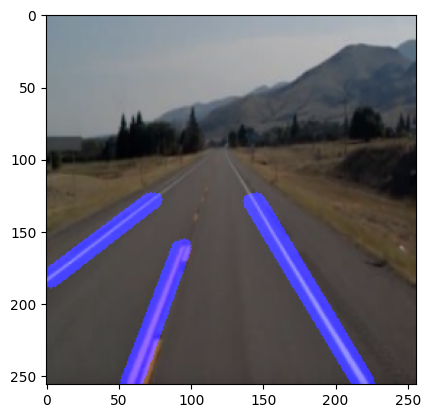

In [7]:
# Load and display test image with detected lanes
test_image_path = '/Users/prachidave/Downloads/python/self driving /test_img.png'
test_image = load_image(test_image_path)
lanes_detected_image = detect_lanes(test_image)
plt.imshow(cv2.cvtColor(lanes_detected_image, cv2.COLOR_BGR2RGB))
plt.show()

Step 6: Steering Angle Calculation
Calculate Steering Angle



In [8]:
def calculate_steering_angle(image):
    # Ensure the image is in uint8 format
    image_uint8 = (image * 255).astype('uint8')
    
    height, width, _ = image_uint8.shape
    gray = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)

    mask = np.zeros_like(edges)
    polygon = np.array([[
        (0, height),
        (width, height),
        (width, height // 2),
        (0, height // 2)
    ]])
    cv2.fillPoly(mask, polygon, 255)
    
    masked_edges = cv2.bitwise_and(edges, mask)

    lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, 50, maxLineGap=50)

    if lines is not None:
        x1, y1, x2, y2 = lines[0][0]
        angle = np.arctan2(y2 - y1, x2 - x1)
        angle = np.degrees(angle)
    else:
        angle = 0.0

    return angle

# Example: Calculate steering angle
steering_angle = calculate_steering_angle(test_image)
print(f'Steering Angle: {steering_angle}')


Steering Angle: 58.96778976153274


Step 7: Integration and Testing
Integrate and Test the Entire Pipeline

Steering Angle: 59.102634839733504


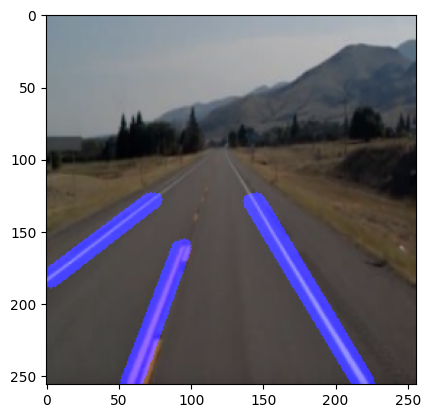

In [9]:
def pipeline(image_path):
    image = load_image(image_path)
    lanes_image = detect_lanes(image)
    angle = calculate_steering_angle(lanes_image)
    print(f'Steering Angle: {angle}')
    plt.imshow(cv2.cvtColor(lanes_image, cv2.COLOR_BGR2RGB))
    plt.show()

# Example: Run the pipeline
pipeline('/Users/prachidave/Downloads/python/self driving /test_img.png')
